## MLP sine function regression

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math
import tensorflow as tf
import csv

In [2]:
DATA_FILE_PESOS_CO = 'Week3/data/MLP_Pesos_CO.csv'
DATA_FILE_PESOS_CS = 'Week3/data/MLP_Pesos_CS.csv'

In [3]:
x_train = np.zeros([21,1],dtype=np.float64)
y_train = np.zeros([21,1],dtype=np.float64)
cont=0;

In [4]:
for i in range(0,21):
    x_train[cont] = (math.pi)*i*0.1
    y_train[cont] = math.sin(x_train[cont] )
    cont=cont+1
          
n_samples=cont 
print('n_samples',n_samples) 

n_samples 21


In [5]:
X = tf.placeholder(tf.float32,(n_samples,1), name='X')
Y = tf.placeholder(tf.float32,(n_samples,1), name='Y')

#W and Bias hidden layer
Wco = tf.Variable(tf.random_uniform((1,10),-1,1))
bco = tf.Variable(tf.random_uniform((10,),-1,1))

#w and Bias output layer
Wcs = tf.Variable(tf.random_uniform((10,1),-1,1))
bcs = tf.Variable(tf.random_uniform((1,),-1,1))

In [6]:
OutputCo = tf.tanh(tf.matmul(X,Wco)+bco)
Output= (tf.matmul(OutputCo,Wcs)+bcs)

In [7]:
loss = tf.reduce_mean(tf.square(Y-Output))
# optimizer
optimizer = tf.train.MomentumOptimizer(0.01,0.9)
train = optimizer.minimize(loss)

In [8]:
init = tf.global_variables_initializer()
sess = tf.Session()
sess.run(init)

Running one iteration:

In [9]:
for i in range(1):
    sess.run(train, {X: x_train, Y: y_train})

curr_Wco, curr_bco, curr_Wcs, curr_bcs,curr_loss, curr_Output = sess.run([Wco, bco,Wcs, bcs, loss,Output], {X:  x_train, Y: y_train})
#print("Wco: %s bco: %s Wcs: %s bcs: %s loss: %s "%(curr_Wco, curr_bco, curr_Wcs, curr_bcs,curr_loss))
print("loss: %s "%(curr_loss))

loss: 3.4474537 


Se visualiza en una grafica la salida de la red y se compara con los datos deseados.

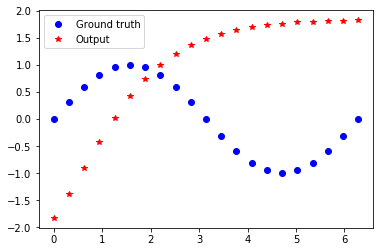

In [10]:
Xg, Yg = x_train, y_train
plt.plot(Xg, Yg, 'bo', label='Ground truth')
plt.plot(Xg, curr_Output, 'r*', label='Output')
plt.legend()
plt.show()

Running i iterations:

In [11]:
for i in range(10000):
  sess.run(train, {X: x_train, Y: y_train})

curr_Wco, curr_bco, curr_Wcs, curr_bcs,curr_loss, curr_Output = sess.run([Wco, bco,Wcs, bcs, loss,Output], {X:  x_train, Y: y_train})
#print("Wco: %s bco: %s Wcs: %s bcs: %s loss: %s Output: %s"%(curr_Wco, curr_bco, curr_Wcs, curr_bcs,curr_loss,curr_Output))
print("Output: %s"%(curr_Output))

Output: [[-0.00435427]
 [ 0.30625463]
 [ 0.5925508 ]
 [ 0.8183324 ]
 [ 0.95679754]
 [ 0.9961103 ]
 [ 0.9385208 ]
 [ 0.79578215]
 [ 0.58381706]
 [ 0.31886595]
 [ 0.01787566]
 [-0.29636663]
 [-0.59085083]
 [-0.8263824 ]
 [-0.9699986 ]
 [-1.0062126 ]
 [-0.938975  ]
 [-0.7855511 ]
 [-0.5685171 ]
 [-0.31004506]
 [-0.02914371]]


Se visualiza en una grafica la salida de la red despues de ser entrenada y se compara con los datos deseados.

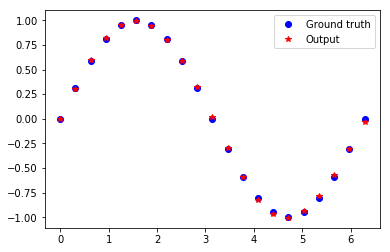

In [12]:
Xg, Yg = x_train, y_train
plt.plot(Xg, Yg, 'bo', label='Ground truth')
plt.plot(Xg, curr_Output, 'r*', label='Output')
plt.legend()
plt.show()

# Validation

In [13]:
x_test = np.zeros([21,1],dtype=np.float64)
y_test = np.zeros([21,1],dtype=np.float64)
cont = 0;

for i in range(0,21):
    x_test[cont] = (math.pi)*i*0.1+ ((math.pi)*0.05)
    y_test[cont] = math.sin(x_test[cont] )
    cont=cont+1

In [14]:
curr_loss2, curr_Output2 = sess.run([loss,Output], {X:  x_test, Y: y_test})
print("loss: %s "%(curr_loss2))

loss: 0.00022998745 


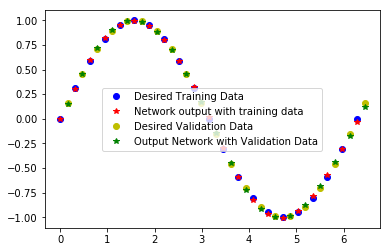

In [15]:
Xg, Yg = x_train, y_train
plt.plot(Xg, Yg, 'bo', label='Desired Training Data')
plt.plot(Xg, curr_Output, 'r*', label= 'Network output with training data')
plt.plot(x_test, y_test, 'yo', label='Desired Validation Data')
plt.plot(x_test, curr_Output2, 'g*', label='Output Network with Validation Data')
plt.legend()
plt.show()

Saving the weights

In [16]:
data3=np.zeros([10,2],dtype=np.float64)
data4=np.zeros([1,11],dtype=np.float64)

In [17]:
curr_loss,curr_Output,curr_Wco,curr_bco,curr_Wcs,curr_bcs=sess.run([loss,Output,Wco,bco,Wcs,bcs], {X:  x_train, Y: y_train})
print("WCO:\n %s \nBCO:\n %s "%(curr_Wco,curr_bco))

WCO:
 [[ 0.1002051   0.3058978  -0.71906203  0.6325626  -0.46591777 -0.78369254
   0.68120676  0.2891019  -0.6788583  -0.5985237 ]] 
BCO:
 [ 0.5683301  -1.715389    2.666921    0.18198219  0.76736194  0.37750214
 -1.5360583  -1.5939465  -0.31244913 -0.7814143 ] 


In [18]:
with open(DATA_FILE_PESOS_CO, 'w', newline='') as csvfile:
    weightwriter = csv.writer(csvfile, delimiter=',',
                            quotechar='"', quoting=csv.QUOTE_MINIMAL)
    
    for ii in range(0,10):
        data3[ii,0]=curr_Wco[0,ii]
        data3[ii,1]=curr_bco[ii]
        weightwriter.writerow(data3[ii,:]) 

In [19]:
print("WCS\n: %s \nBCS:\n %s "%(curr_Wcs,curr_bcs)) 

WCS
: [[ 1.1450952 ]
 [ 1.5928984 ]
 [ 2.009011  ]
 [ 0.9467748 ]
 [ 0.36498   ]
 [-0.7789436 ]
 [-0.93063474]
 [ 2.0522363 ]
 [-0.08056781]
 [ 0.5023149 ]] 
BCS:
 [0.13035117] 


In [20]:
with open(DATA_FILE_PESOS_CS, 'w', newline='') as csvfile:
    weightwriter = csv.writer(csvfile, delimiter=',',
                            quotechar='"', quoting=csv.QUOTE_MINIMAL)
    
    for ii in range(0,11):
        if ii<10:
            data4[0,ii]=curr_Wcs[ii,0]
        if ii==10:
            data4[0,ii]=curr_bcs[0]
    
    weightwriter.writerow(data4[0,:])   